<a href="https://colab.research.google.com/github/Prajwal011/LLM-s/blob/main/Calorie_Counter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loading image

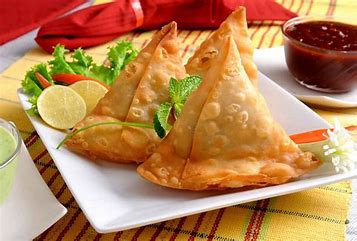

In [12]:
from PIL import Image

image = Image.open('food1.jpg')
image

### Function to pass Image to function for Classification

In [9]:
from IPython.core.display import display, HTML
import requests
from google.colab import userdata

api_key = userdata.get('api_key')

def identify_image(image_path):
    """Identify the food item in the image."""
    API_URL = "https://api-inference.huggingface.co/models/nateraw/food"
    headers = {"Authorization": "Bearer "+userdata.get('hf_token')}
    with open(image_path, "rb") as f:
        data = f.read()
    response = requests.post(API_URL, headers=headers, data=data)
    return response.json()[0]['label']


output = identify_image("food1.jpg")
food_name = output
print(food_name)

samosa


### Function to pass name to api for calorie retrieval

In [11]:
def get_calories(food_name):
    """Get the calorie information of the identified food item."""
    api_url = 'https://api.api-ninjas.com/v1/nutrition?query={}'.format(food_name)
    response = requests.get(api_url, headers={'X-Api-Key': api_key})
    if response.status_code == requests.codes.ok:
        nutrition_info = response.json()
    else:
        nutrition_info = {"Error": response.status_code, "Message": response.text}
    return nutrition_info

nutrition_info = get_calories(food_name)
print(nutrition_info)

[{'name': 'samosa', 'calories': 'Only available for premium subscribers.', 'serving_size_g': 'Only available for premium subscribers.', 'fat_total_g': 17.4, 'fat_saturated_g': 7.1, 'protein_g': 'Only available for premium subscribers.', 'sodium_mg': 426, 'potassium_mg': 52, 'cholesterol_mg': 27, 'carbohydrates_total_g': 24.2, 'fiber_g': 2.1, 'sugar_g': 1.6}]


### Function to structure the json output from api

In [13]:
def format_nutrition_info(nutrition_info):
    """Format the nutritional information into an HTML table."""
    if "Error" in nutrition_info:
        return f"Error: {nutrition_info['Error']} - {nutrition_info['Message']}"

    if len(nutrition_info) == 0:
        return "No nutritional information found."

    nutrition_data = nutrition_info[0]
    table = f"""
    <table border="1" style="width: 100%; border-collapse: collapse;">
        <tr><th colspan="4" style="text-align: center;"><b>Nutrition Facts</b></th></tr>
        <tr><td colspan="4" style="text-align: center;"><b>Food Name: {nutrition_data['name']}</b></td></tr>
        <tr>
            <td style="text-align: left;"><b>Calories</b></td><td style="text-align: right;">{nutrition_data['calories']}</td>
            <td style="text-align: left;"><b>Serving Size (g)</b></td><td style="text-align: right;">{nutrition_data['serving_size_g']}</td>
        </tr>
        <tr>
            <td style="text-align: left;"><b>Total Fat (g)</b></td><td style="text-align: right;">{nutrition_data['fat_total_g']}</td>
            <td style="text-align: left;"><b>Saturated Fat (g)</b></td><td style="text-align: right;">{nutrition_data['fat_saturated_g']}</td>
        </tr>
        <tr>
            <td style="text-align: left;"><b>Protein (g)</b></td><td style="text-align: right;">{nutrition_data['protein_g']}</td>
            <td style="text-align: left;"><b>Sodium (mg)</b></td><td style="text-align: right;">{nutrition_data['sodium_mg']}</td>
        </tr>
        <tr>
            <td style="text-align: left;"><b>Potassium (mg)</b></td><td style="text-align: right;">{nutrition_data['potassium_mg']}</td>
            <td style="text-align: left;"><b>Cholesterol (mg)</b></td><td style="text-align: right;">{nutrition_data['cholesterol_mg']}</td>
        </tr>
        <tr>
            <td style="text-align: left;"><b>Total Carbohydrates (g)</b></td><td style="text-align: right;">{nutrition_data['carbohydrates_total_g']}</td>
            <td style="text-align: left;"><b>Fiber (g)</b></td><td style="text-align: right;">{nutrition_data['fiber_g']}</td>
        </tr>
        <tr>
            <td style="text-align: left;"><b>Sugar (g)</b></td><td style="text-align: right;">{nutrition_data['sugar_g']}</td>
            <td></td><td></td>
        </tr>
    </table>
    """
    return table

formatted_nutrition_info = format_nutrition_info(nutrition_info)
HTML(formatted_nutrition_info)

### combining All Functions

In [ ]:
from PIL import Image
import warnings
import requests
import gradio as gr
from IPython.core.display import display, HTML
import requests
from google.colab import userdata

warnings.filterwarnings('ignore')

api_key = userdata.get('api_key')

def identify_image(image_path):
    """Identify the food item in the image."""
    API_URL = "https://api-inference.huggingface.co/models/nateraw/food"
    headers = {"Authorization": "Bearer "+userdata.get('hf_token')}
    with open(image_path, "rb") as f:
        data = f.read()
    response = requests.post(API_URL, headers=headers, data=data)
    return response.json()[0]['label']

def get_calories(food_name):
    """Get the calorie information of the identified food item."""
    api_url = 'https://api.api-ninjas.com/v1/nutrition?query={}'.format(food_name)
    response = requests.get(api_url, headers={'X-Api-Key': api_key})
    if response.status_code == requests.codes.ok:
        nutrition_info = response.json()
    else:
        nutrition_info = {"Error": response.status_code, "Message": response.text}
    return nutrition_info

def format_nutrition_info(nutrition_info):
    """Format the nutritional information into an HTML table."""
    if "Error" in nutrition_info:
        return f"Error: {nutrition_info['Error']} - {nutrition_info['Message']}"

    if len(nutrition_info) == 0:
        return "No nutritional information found."

    nutrition_data = nutrition_info[0]
    table = f"""
    <table border="1" style="width: 100%; border-collapse: collapse;">
        <tr><th colspan="4" style="text-align: center;"><b>Nutrition Facts</b></th></tr>
        <tr><td colspan="4" style="text-align: center;"><b>Food Name: {nutrition_data['name']}</b></td></tr>
        <tr>
            <td style="text-align: left;"><b>Calories</b></td><td style="text-align: right;">{nutrition_data['calories']}</td>
            <td style="text-align: left;"><b>Serving Size (g)</b></td><td style="text-align: right;">{nutrition_data['serving_size_g']}</td>
        </tr>
        <tr>
            <td style="text-align: left;"><b>Total Fat (g)</b></td><td style="text-align: right;">{nutrition_data['fat_total_g']}</td>
            <td style="text-align: left;"><b>Saturated Fat (g)</b></td><td style="text-align: right;">{nutrition_data['fat_saturated_g']}</td>
        </tr>
        <tr>
            <td style="text-align: left;"><b>Protein (g)</b></td><td style="text-align: right;">{nutrition_data['protein_g']}</td>
            <td style="text-align: left;"><b>Sodium (mg)</b></td><td style="text-align: right;">{nutrition_data['sodium_mg']}</td>
        </tr>
        <tr>
            <td style="text-align: left;"><b>Potassium (mg)</b></td><td style="text-align: right;">{nutrition_data['potassium_mg']}</td>
            <td style="text-align: left;"><b>Cholesterol (mg)</b></td><td style="text-align: right;">{nutrition_data['cholesterol_mg']}</td>
        </tr>
        <tr>
            <td style="text-align: left;"><b>Total Carbohydrates (g)</b></td><td style="text-align: right;">{nutrition_data['carbohydrates_total_g']}</td>
            <td style="text-align: left;"><b>Fiber (g)</b></td><td style="text-align: right;">{nutrition_data['fiber_g']}</td>
        </tr>
        <tr>
            <td style="text-align: left;"><b>Sugar (g)</b></td><td style="text-align: right;">{nutrition_data['sugar_g']}</td>
            <td></td><td></td>
        </tr>
    </table>
    """
    return table

def main_process(image_path):
    """Identify the food item and fetch its calorie information."""
    food_name = identify_image(image_path)
    nutrition_info = get_calories(food_name)
    formatted_nutrition_info = format_nutrition_info(nutrition_info)
    return formatted_nutrition_info

# Define the Gradio interface
def gradio_interface(image):
    formatted_nutrition_info = main_process(image)
    return formatted_nutrition_info

# Create the Gradio UI
iface = gr.Interface(
    fn=gradio_interface,
    inputs=gr.Image(type="filepath"),
    outputs="html",
    title="Food Identification and Nutrition Info",
    description="Upload an image of food to get nutritional information.",
    allow_flagging="never"  # Disable flagging
)

# Launch the Gradio app
if __name__ == "__main__":
    iface.launch()